In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/top-300-asian-universities-qs-rankings-2024/topuniversities.csv")

In [3]:
df.head()

,Rank,Ordinal Rank,University Name,Overall Score,City,Country,Citations per Paper,Papers per Faculty,Academic Reputation,Faculty Student Ratio,Staff with PhD,International Research Center,International Students,Outbound Exchange,Inbound Exchange,International Faculty,Employer Reputation
0,1,1,Peking University,100.0,Beijing,China,96.4,79.8,100.0,98.6,90.7,98.0,69.1,100.0,88.5,83.2,100.0
1,2,2,The University of Hong Kong,99.7,Pokfulam,Hong Kong,99.5,55.0,100.0,93.3,97.4,98.4,100.0,100.0,99.8,100.0,96.8
2,3,3,National University of Singapore (NUS),98.9,Singapore,Singapore,99.9,57.4,100.0,85.8,82.5,99.9,99.2,97.6,93.4,100.0,99.9
3,4,4,Nanyang Technological University,98.3,Singapore,Singapore,100.0,53.8,100.0,93.0,67.0,99.7,98.8,97.9,90.5,100.0,98.8
4,5,5,Fudan University,97.2,Shanghai,China,92.1,63.1,99.8,92.5,73.4,92.1,81.0,94.9,99.5,98.9,99.5


In [4]:
df.tail()

,Rank,Ordinal Rank,University Name,Overall Score,City,Country,Citations per Paper,Papers per Faculty,Academic Reputation,Faculty Student Ratio,Staff with PhD,International Research Center,International Students,Outbound Exchange,Inbound Exchange,International Faculty,Employer Reputation
295,296,296,National Chinyi University of Technology,29.5,Taichung City,Taiwan,25.8,15.9,31.9,12.9,52.1,11.5,29.8,3.4,17.2,5.1,46.7
296,297,296,Sungshin Women's University,29.5,Seoul,South Korea,9.1,2.1,21.4,93.0,18.6,2.5,22.5,85.5,44.6,7.7,33.9
297,298,298,Northwest University (China),29.2,Xi'an,China,64.5,27.4,16.1,69.5,17.5,49.7,13.3,47.9,6.1,10.6,5.3
298,299,299,Ocean University of China,29.1,Qingdao,China,48.1,60.5,20.8,13.9,33.0,76.4,6.5,27.3,2.8,8.5,12.4
299,300,300,Huazhong Agricultural University,29.0,Wuhan,China,91.5,52.2,16.7,12.1,61.0,45.6,6.6,11.5,1.5,11.7,9.3


In [5]:
df.shape

(300, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           300 non-null    int64  
 1   Ordinal Rank                   300 non-null    int64  
 2   University Name                300 non-null    object 
 3   Overall Score                  300 non-null    float64
 4   City                           300 non-null    object 
 5   Country                        300 non-null    object 
 6   Citations per Paper            300 non-null    float64
 7   Papers per Faculty             300 non-null    float64
 8   Academic Reputation            300 non-null    float64
 9   Faculty Student Ratio          300 non-null    float64
 10  Staff with PhD                 294 non-null    float64
 11  International Research Center  300 non-null    float64
 12  International Students         296 non-null    flo

In [7]:
df.dtypes

Rank                               int64
Ordinal Rank                       int64
University Name                   object
Overall Score                    float64
City                              object
Country                           object
Citations per Paper              float64
Papers per Faculty               float64
Academic Reputation              float64
Faculty Student Ratio            float64
Staff with PhD                   float64
International Research Center    float64
International Students           float64
Outbound Exchange                float64
Inbound Exchange                 float64
International Faculty            float64
Employer Reputation              float64
dtype: object

Data Cleaning -> some data is null

In [8]:
# data cleaning
# count number of null value
df.isnull().sum()
# drop null rows
df = df.dropna()
# another way -> fillna.mean(): not drop but fill null with mean of that col

In [33]:
# check number of null
df.isnull().sum()

Rank                             0
Ordinal Rank                     0
University Name                  0
Overall Score                    0
City                             0
Country                          0
Citations per Paper              0
Papers per Faculty               0
Academic Reputation              0
Faculty Student Ratio            0
Staff with PhD                   0
International Research Center    0
International Students           0
Outbound Exchange                0
Inbound Exchange                 0
International Faculty            0
Employer Reputation              0
dtype: int64

Statistic: EDA

In [10]:
df.describe()

,Rank,Ordinal Rank,Overall Score,Citations per Paper,Papers per Faculty,Academic Reputation,Faculty Student Ratio,Staff with PhD,International Research Center,International Students,Outbound Exchange,Inbound Exchange,International Faculty,Employer Reputation
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,145.652482,145.287234,53.022340,44.076241,40.898582,53.048227,51.684397,53.729078,60.435106,37.227305,40.365603,36.984397,38.561348,55.970922
std,86.185143,85.996022,19.251825,34.246873,30.147239,26.212242,30.870763,35.046105,31.508905,31.513777,34.308773,36.184712,30.554163,29.865648
min,1.000000,1.000000,29.000000,1.000000,1.200000,8.800000,2.600000,1.000000,1.100000,1.400000,1.000000,1.000000,1.000000,4.200000
25%,71.250000,71.250000,36.300000,10.125000,14.025000,32.650000,22.675000,15.200000,32.525000,10.725000,9.975000,4.525000,12.850000,30.550000
50%,142.500000,142.500000,48.850000,38.150000,34.750000,46.450000,49.000000,62.300000,68.400000,26.300000,31.950000,23.950000,29.550000,54.200000
75%,219.750000,219.000000,65.100000,75.950000,62.325000,71.725000,80.225000,85.575000,89.150000,62.525000,66.950000,72.375000,56.875000,82.800000
max,300.000000,300.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.900000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Daata visualization

In [11]:
# check if each row of overall score equal to max score or not -> the first rank has max overall score
top_u = df['Overall Score'] == df['Overall Score'].max()
top_uni = df[top_u]

In [12]:
top_uni

,Rank,Ordinal Rank,University Name,Overall Score,City,Country,Citations per Paper,Papers per Faculty,Academic Reputation,Faculty Student Ratio,Staff with PhD,International Research Center,International Students,Outbound Exchange,Inbound Exchange,International Faculty,Employer Reputation
0,1,1,Peking University,100.0,Beijing,China,96.4,79.8,100.0,98.6,90.7,98.0,69.1,100.0,88.5,83.2,100.0


In [13]:
worse_uni = df[df['Overall Score'] == df['Overall Score'].min()]

In [14]:
worse_uni

,Rank,Ordinal Rank,University Name,Overall Score,City,Country,Citations per Paper,Papers per Faculty,Academic Reputation,Faculty Student Ratio,Staff with PhD,International Research Center,International Students,Outbound Exchange,Inbound Exchange,International Faculty,Employer Reputation
299,300,300,Huazhong Agricultural University,29.0,Wuhan,China,91.5,52.2,16.7,12.1,61.0,45.6,6.6,11.5,1.5,11.7,9.3


In [15]:
# visualization
no_country = df['Country'].value_counts()
no_country

Country
China          60
India          34
South Korea    32
Japan          27
Malaysia       25
Taiwan         18
Indonesia      13
Kazakhstan     13
Pakistan       11
Thailand        9
Iran            8
Hong Kong       7
Philippines     4
Bangladesh      4
Vietnam         4
Singapore       3
Kyrgystan       3
Brunei          2
Macau SAR       2
Uzbekistan      2
Sri Lanka       1
Name: count, dtype: int64

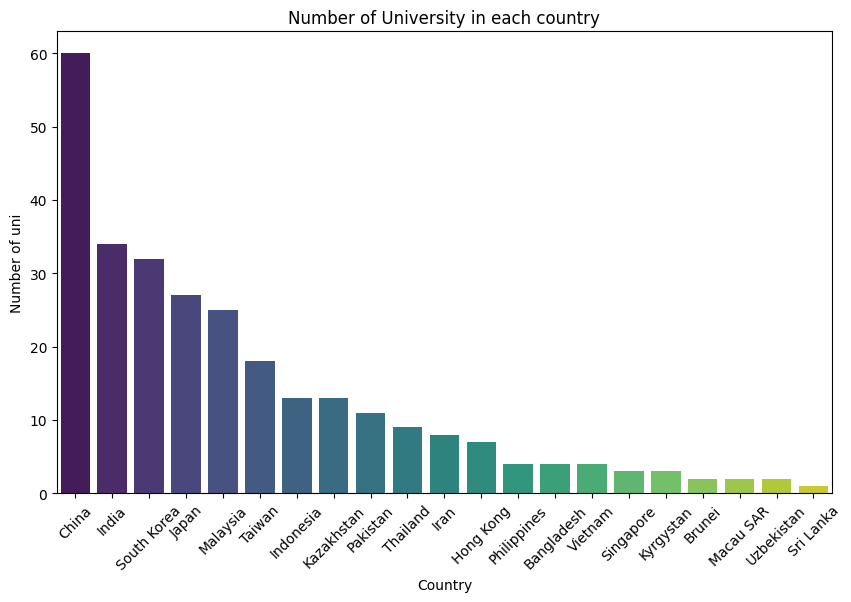

In [16]:
# bar chart
plt.figure(figsize = (10,6))
sns.barplot(x = no_country.index, y = no_country.values, palette = 'viridis')
plt.title("Number of University in each country")
plt.xlabel("Country")
plt.ylabel("Number of uni")
plt.xticks(rotation = 45)
plt.show()

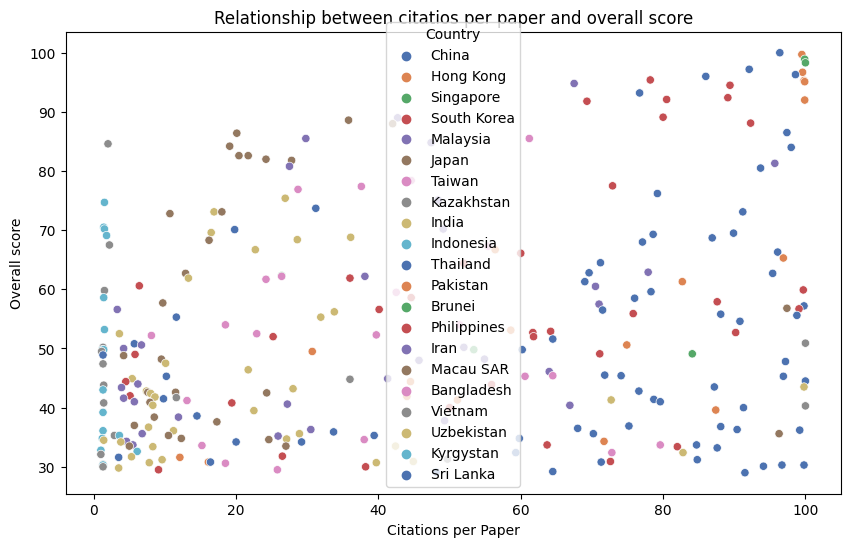

In [17]:
# scatter plot
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Citations per Paper',
                y = 'Overall Score',
                hue= 'Country', 
                data = df, 
                palette = 'deep')
plt.title("Relationship between citatios per paper and overall score")
plt.xlabel("Citations per Paper")
plt.ylabel("Overall score")
plt.show()

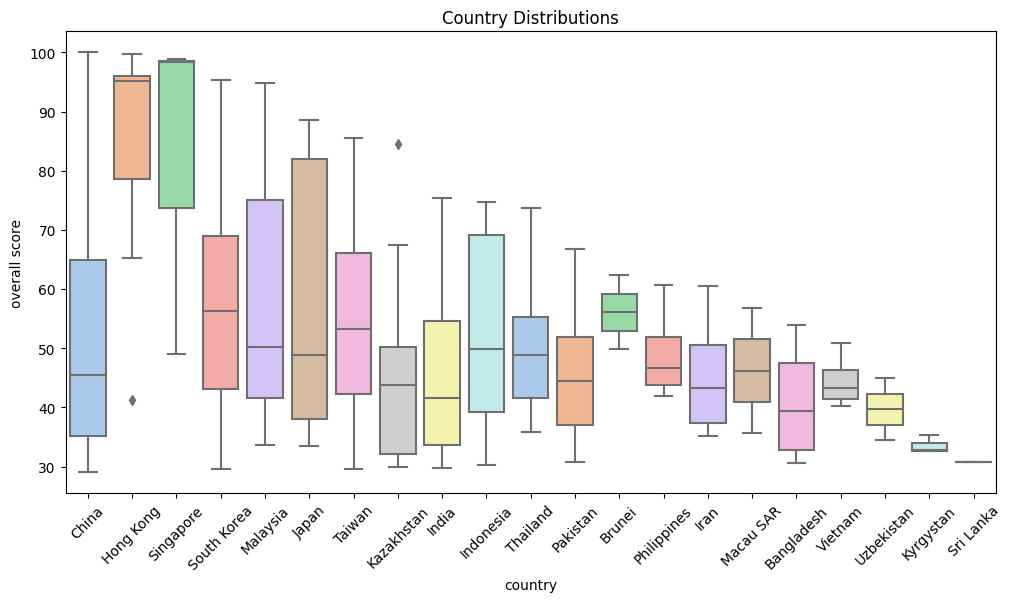

In [18]:
# box plot
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Country',
            y = 'Overall Score', 
            data = df, 
            palette = 'pastel')
plt.title("Country Distributions")
plt.xlabel("country")
plt.ylabel("overall score")
plt.xticks(rotation = 45)
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282 entries, 0 to 299
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           282 non-null    int64  
 1   Ordinal Rank                   282 non-null    int64  
 2   University Name                282 non-null    object 
 3   Overall Score                  282 non-null    float64
 4   City                           282 non-null    object 
 5   Country                        282 non-null    object 
 6   Citations per Paper            282 non-null    float64
 7   Papers per Faculty             282 non-null    float64
 8   Academic Reputation            282 non-null    float64
 9   Faculty Student Ratio          282 non-null    float64
 10  Staff with PhD                 282 non-null    float64
 11  International Research Center  282 non-null    float64
 12  International Students         282 non-null    float64


In [36]:
# correlation
# select only numeric columns
some_df = df[['Overall Score',
'Citations per Paper',
'Papers per Faculty',
'Academic Reputation',
'Faculty Student Ratio',
'Staff with PhD',
'International Research Center',
'International Students',
'Outbound Exchange',
'Inbound Exchange',
'International Faculty',
'Employer Reputation']]

In [34]:
some_df.corr()
# corr = 1 -> very strong
# corr = 0 -> no relation
# corr = -1 -> opposite relation

,Overall Score,Citations per Paper,Papers per Faculty,Academic Reputation,Faculty Student Ratio,Staff with PhD,International Research Center,International Students,Outbound Exchange,Inbound Exchange,International Faculty,Employer Reputation
Overall Score,1.000000,0.302392,0.334776,0.896712,0.467353,0.476719,0.497246,0.498245,0.387442,0.452497,0.425752,0.765080
Citations per Paper,0.302392,1.000000,0.526414,-0.030483,-0.010131,0.300132,0.476857,0.093370,0.189343,0.091219,0.047778,-0.125389
Papers per Faculty,0.334776,0.526414,1.000000,0.131698,-0.160200,0.567743,0.544444,-0.106312,-0.032543,-0.118844,-0.114391,-0.012765
Academic Reputation,0.896712,-0.030483,0.131698,1.000000,0.381678,0.310921,0.341063,0.374503,0.216883,0.314425,0.358904,0.797597
Faculty Student Ratio,0.467353,-0.010131,-0.160200,0.381678,1.000000,0.127623,-0.090242,0.484029,0.427617,0.456390,0.355218,0.242322
Staff with PhD,0.476719,0.300132,0.567743,0.310921,0.127623,1.000000,0.321363,0.236310,0.151528,0.172541,0.059475,0.133020
International Research Center,0.497246,0.476857,0.544444,0.341063,-0.090242,0.321363,1.000000,-0.006050,-0.101117,-0.066556,-0.094265,0.139379
International Students,0.498245,0.093370,-0.106312,0.374503,0.484029,0.236310,-0.006050,1.000000,0.587743,0.635259,0.629132,0.311544
Outbound Exchange,0.387442,0.189343,-0.032543,0.216883,0.427617,0.151528,-0.101117,0.587743,1.000000,0.760024,0.574191,0.190368
Inbound Exchange,0.452497,0.091219,-0.118844,0.314425,0.456390,0.172541,-0.066556,0.635259,0.760024,1.000000,0.579914,0.292959


<Axes: >

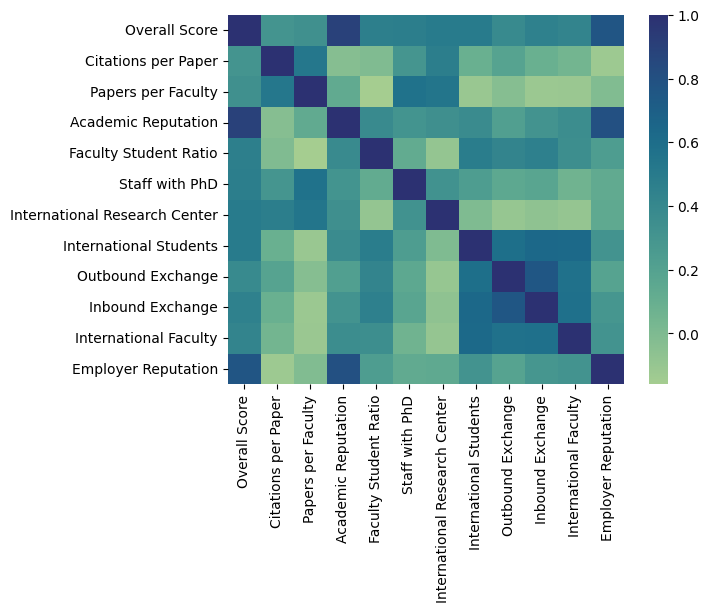

In [35]:
sns.heatmap(some_df.corr(), cmap="crest")

In [30]:
# University which has the most citations per paper in each country
top_cit = df.loc[df.groupby("Country")['Citations per Paper'].idxmax()]

In [31]:
top_cit

,Rank,Ordinal Rank,University Name,Overall Score,City,Country,Citations per Paper,Papers per Faculty,Academic Reputation,Faculty Student Ratio,Staff with PhD,International Research Center,International Students,Outbound Exchange,Inbound Exchange,International Faculty,Employer Reputation
156,157,154,North South University,45.3,Dhaka,Bangladesh,60.6,9.1,44.4,13.4,6.6,32.5,2.3,33.8,3.2,23.9,87.9
135,136,133,Universiti Teknologi Brunei,49.8,Bandar Seri Begawan,Brunei,53.4,20.8,49.8,96.7,63.5,17.2,29.2,97.1,10.5,100.0,31.9
162,163,163,Hunan University,44.5,Changsha,China,100.0,52.0,29.0,30.3,45.9,70.3,7.8,28.8,12.7,14.2,39.5
10,11,11,The Hong Kong University of Science and Techno...,95.1,Clear Water Bay,Hong Kong,99.9,77.8,99.7,76.6,94.3,70.6,99.8,100.0,98.8,100.0,92.3
169,170,169,Shoolini University of Biotechnology and Manag...,43.5,Solan,India,99.8,42.1,28.5,17.4,29.0,67.7,6.8,14.0,2.7,63.6,46.7
58,59,59,Bandung Institute of Technology (ITB),69.1,Bandung,Indonesia,1.8,19.4,88.5,71.0,79.8,35.8,18.0,26.7,56.9,99.6,96.5
96,97,97,Sharif University of Technology,57.5,Tehran,Iran,71.0,99.1,40.4,8.6,99.9,87.6,3.2,1.4,2.5,8.4,82.1
22,23,23,Kyoto University,88.0,Kyoto,Japan,42.0,55.8,100.0,98.7,90.4,99.3,62.3,10.5,24.8,42.0,100.0
270,271,271,NJSC KIMEP University,31.3,Almaty,Kazakhstan,49.7,12.8,22.4,20.1,7.3,1.5,56.5,53.5,26.3,95.8,48.8
260,261,261,American University of Central Asia,32.6,Bishkek,Kyrgystan,6.1,4.2,30.2,85.3,2.9,2.7,99.9,52.1,40.8,71.3,31.4


In [28]:
df.to_csv("cleaned_uni_data.csv", index=False)